# Les arbres

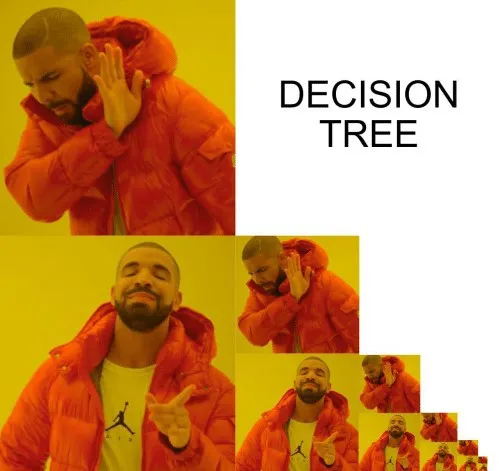


 La technique de l'arbre de décision est employée en classement pour détecter des critères permettant de répartir les individus d'une population en $n$ classes. On commence par choisir la variable qui sépare le mieux les individus en plusieurs classes (généralement 2). Nous avons alors des sous populations distinctes, à partir d'un ensemble initial, que l'on appellera noeud. On réitère la même opération sur chaque nouveau noeud obtenu jusqu'à ce que la séparation des individus ne soit plus pertinente (nous définirons cette notion de pertinence plus tard). Les noeuds finaux sont appelés feuilles. Après la construction de l'arbre nous obtenons des feuilles caractérisant une seule classe. Un individu est affecté à une feuille (sous entendu: une classe), avec une certaine probabilité, lorsqu'il satisfait l'ensemble des règles lui permettant d'aboutir à la feuille.  L'ensemble des règles de toutes les feuilles constitue le modèle de classement.

Les arbres de décision conçus pour le classement permettent généralement d'effectuer une prédiction, en faisant varier le critère de scission pour chaque noeuds (à l'exception de quelques techniques particulières, comme QUEST, qui combine toutes les variables pour choisir le critère de scission).
Dans un arbre de régression, on travaille exclusivement sur des variables quantitatives continues.
On cherche à prédire la valeur d'une variable pré-définie en entrée de la fonction, puis on construit un arbre à partir des autres variables explicatives.
Le principe de l'arbre est le suivant:

*   La variable à expliquer doit avoir une variance plus faible dans les noeds-fils que le noeud-père. Au niveau le plus élevé il y a un nœud racine, dit : nœud père. Au niveau directement inférieur, il y a au moins deux nœuds fils.
*   La variable à expliquer doit avoir une moyenne la plus distincte possible d'un noeud-fils à un autre.


Il faut donc choisir des noeuds-fils qui minimisent la variance intraclasse et maximise la variance interclasse. On peut appliquer un test de Fisher-Snedecor au rapport Variance intraclasse / Variance interclasse.

On considère qu'il faut séparer un noeud lorsque le rapport des variances a au plus 20\% de chance d'être aussi élevé si la variable à expliquer est indépendante de la variables choisie pour scinder le noeud-père. Intuitivement on sépare un noeud lorsqu'on a au moins 20\% de chance d'observer une différence sur la variance (entre le noeud initial et le noeud séparé).

# Arbre de régression

## Chargement des données

On décide d'observer les différences de poids pour une population de nouveaux nés dans un service de recherche.

Nous avons comme information :
*   X : l'ID du bébé évalué
*   bwt :  poids à la naissance (en onces, soit 1 once = soit 28,349 g)
*   gestation : durée de la grossesse (en jours)
*   parity :  1 si le bébé est né en premier, 0 sinon
*   age :  âge de la mère (en années)
*   height :  taille de la mère (en pouces)
*   weight:  poids de la mère (en livres)
*   smoke: 1 si la mère est fumeuse, 0 sinon.

Commencez par charger les données du ficher bebe.csv dans Python.


In [42]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import pandas as pd
import numpy as np




In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [4]:
Data = pd.read_csv('bebe.csv')
df = pd.DataFrame(data = Data)

df.describe()

,X,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,3386.702747,279.101363,0.262351,27.228279,162.685486,58.276913,0.390971
std,339.048915,519.608671,16.010305,0.440100,5.817839,6.416298,9.404905,0.488176
min,1.000000,1559.222500,148.000000,0.000000,15.000000,134.620000,39.462504,0.000000
25%,294.250000,3061.746000,272.000000,0.000000,23.000000,157.480000,51.822886,0.000000
50%,587.500000,3401.940000,280.000000,0.000000,26.000000,162.560000,56.699000,0.000000
75%,880.750000,3713.784500,288.000000,1.000000,31.000000,167.640000,63.049288,1.000000
max,1174.000000,4989.512000,353.000000,1.000000,45.000000,182.880000,113.398000,1.000000


 Commentez les valeurs médianes pour les variables quantitatives.  Supprimer la colonne qui est sans interêt.

On peut parity et smoke on comme médianne 0 . On vas supprimer X l'id du bébé.

In [5]:
df = df.drop('X',axis=1) #attention si on reexecute la céllule sa met message d'erreur car c'est deja supprimer
df

,bwt,gestation,parity,age,height,weight,smoke
0,3401.9400,284,0,27,157.48,45.359200,0
1,3203.4935,282,0,33,162.56,61.234920,0
2,3628.7360,279,0,28,162.56,52.163080,1
3,3061.7460,282,0,23,170.18,56.699000,1
4,3855.5320,286,0,25,157.48,42.184056,0
...,...,...,...,...,...,...,...
1169,3203.4935,275,1,27,152.40,45.359200,0
1170,3628.7360,265,0,24,170.18,54.431040,0
1171,3685.4350,291,0,30,165.10,68.038800,1
1172,3543.6875,281,1,21,165.10,49.895120,0


Y-a-t-il des valeurs manquantes  ?  Pourquoi cela peut-il être un problème pour l'entraînement du modèle ?

In [6]:
#Nouvelle fonction
def num_missing(x):
    return sum(x.isnull())

#Appliquer la fonction par colonne
print("Missing values per column:")
## Vérifiez le nombre de valeurs manquantes par colonne, puis vérifiez celles qui ont des valeurs manquantes.
print(df.apply(num_missing, axis=0).where(lambda x : x != 0).dropna().head(20))
#axis=0 defines that function is to be applied on each column

Missing values per column:
Series([], dtype: float64)


Non il n'y a pas de valeur manquante. Les valeurs manquantes sont un problème pour l'entrainement du modèle car Si les données manquantes sont aléatoires, la distribution des données est toujours représentative de la population. Vous pouvez probablement ignorer ces valeurs manquantes. Cependant, si les données sont systématiquement manquantes, l'analyse que vous faites peut être biaisée. 

## Observation des variables et création des dataframe

Nous devons vérifier la répartition des données et les relations entre chacune des variables explicatives et la variable de réponse. Commencez par exécuter la fonction pairplot de la librairie seaborn :

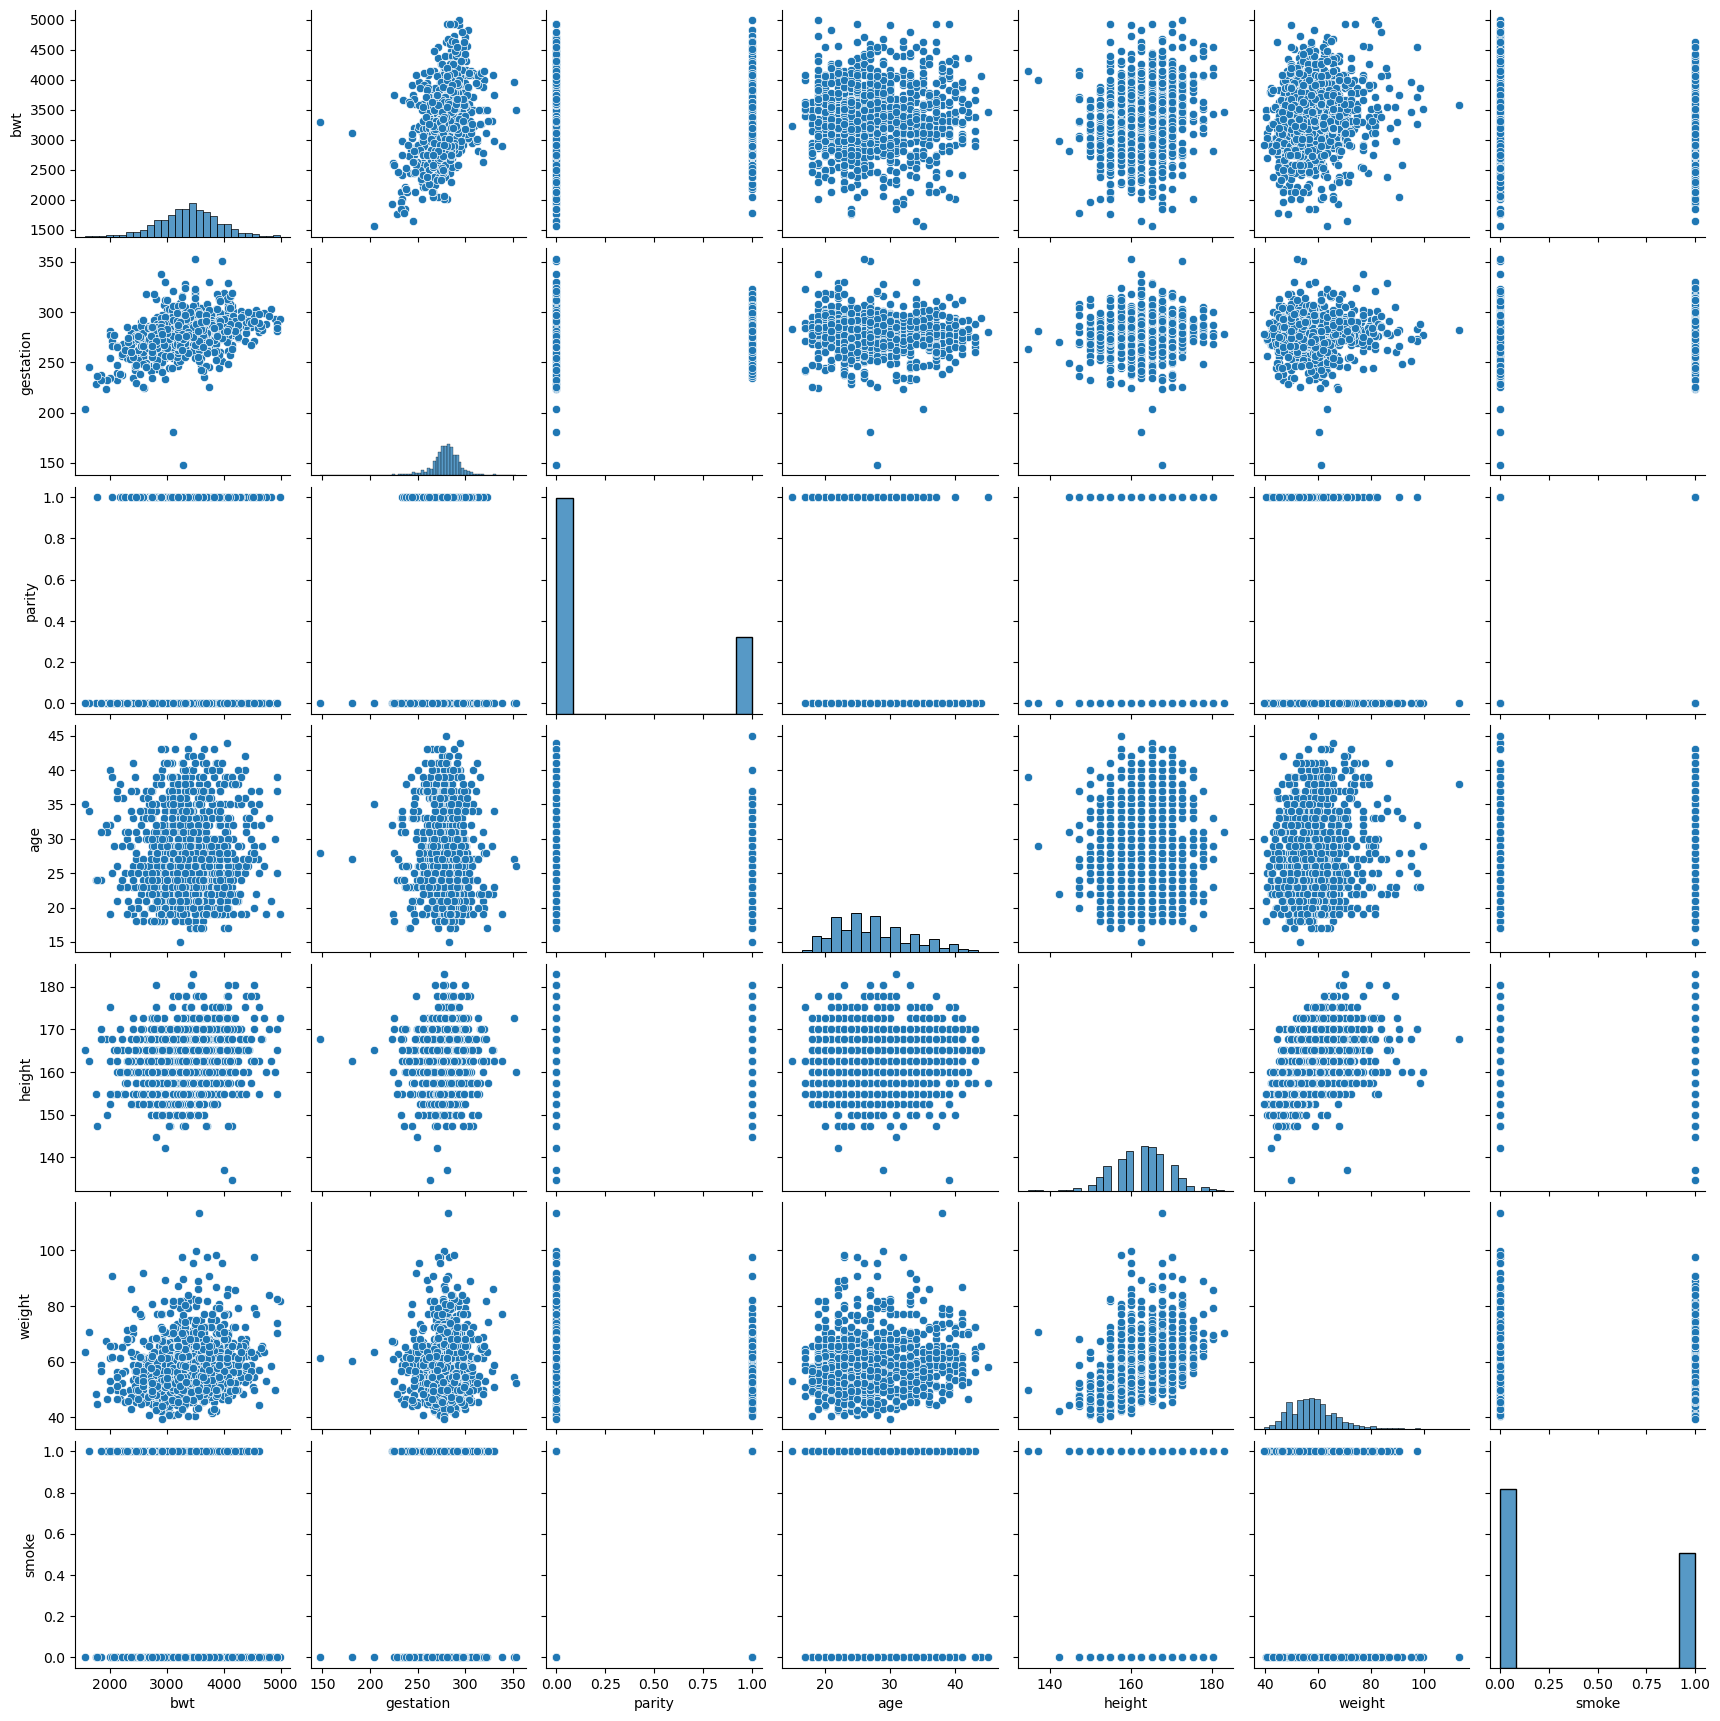

In [7]:
import seaborn as sns
#create pairs plot for all numeric variables
sns.pairplot(df)

Identifiez les forte corrélations entre les variables.

Il y'as une forte correlation entre smoke, parity et les autres

Identifiez les faibles corrélations entre les variables.

Tous les autre

Y-a-t-il plus de mère fumeuses ou non fumeuse ?

In [8]:
a=0
b=0
for k in df['smoke']:
    if k==0:
        a=a+1
    else:
        b=b+1
print('il y as',a,'mères non fumeuses et',b,'mères fumeuses')

il y as 715 mères non fumeuses et 459 mères fumeuses


Pour construire un bon modèle, nous devons d'abord diviser notre ensemble
de données en un ensemble d'entraînement et un ensemble de test. Construire les dataframe X\_test, X\_test, Y\_train, Y\_test à l'aide de la fonction \texttt{train\_test\_split} de \textit{sklearn.model\_selection} en utilisant 70\% de l'échantillon pour des données de train et les 30\% restants pour les données de test (on fixera la graine à 42). Y\_train, Y\_test seront associés à la variable à prédire bwt et X\_test, X\_test aux autres variables explicatives.

In [9]:
from sklearn.model_selection import train_test_split

Y = df['bwt']
X = df[['gestation','parity','age','height','weight','smoke']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print((len(X_train)/(len(X_train)+len(X_test)))*100, 'donc c est bien 70% des valeurs')

69.93185689948893 donc c est bien 70% des valeurs


## DecisionTreeRegressor du Package scikit-learn

Nous utiliserons l'implémentation de sklearn d'un d'arbre de
régression et, pour apprendre à l'utiliser, voici les éléments suivants [docs](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html\#sklearn.tree.DecisionTreeRegressor.get_params) ou vous pouvez mettre un point d'interrogation avant un appel
l'objet. L'ajout d'un ? à une méthode, une variable ou une fonction affichera la doc définie de cette méthode.


Cette fonction DecisionTreeRegressor génère un arbre par partitionnement récursif binaire en utilisant la variable qu'on souhaite prédire (mise dans une formule spécifiée en entrée) et en fractionnement les variables explicatives.
La variable à prédire doit être continue pour un arbre de régression et binaire pour un arbre de classification.
La variable à prédire est divisée en $X<a$ et $X>a$, de façon itérative et en faisant varier la valeur de $a$.
La scission $a$  est la valeur qui maximise la réduction de la variance (pour un abre de régression et l' "impureté" pour un arbre de classification .
Le fractionnement itératif est poursuivi jusqu'à ce que les noeuds terminaux soient trop petits ou trop peu différentiables pour être divisés.
Appliquez la fonction DecisionTreeRegressor sur votre dataframe pour prédire la variable btw à partir de toutes les variables.

In [10]:
from sklearn.tree import DecisionTreeRegressor
?DecisionTreeRegressor

Nous allons construire un arbre assez simple pour le début. Il faut dans un premier temps créer l'objet avec ses paramètres et dans un second temps l'appliquer à un dataframe.

In [11]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)

regr_1.fit(X_train, Y_train)



DecisionTreeRegressor(max_depth=2)

Nous allons utiliser la librairie matplotlib et tree de sklearn pour afficher l'arbre obtenu. Il faut spécifier les informations/dimensions que l'on souhaite obtenir pour faciliter la lecture.


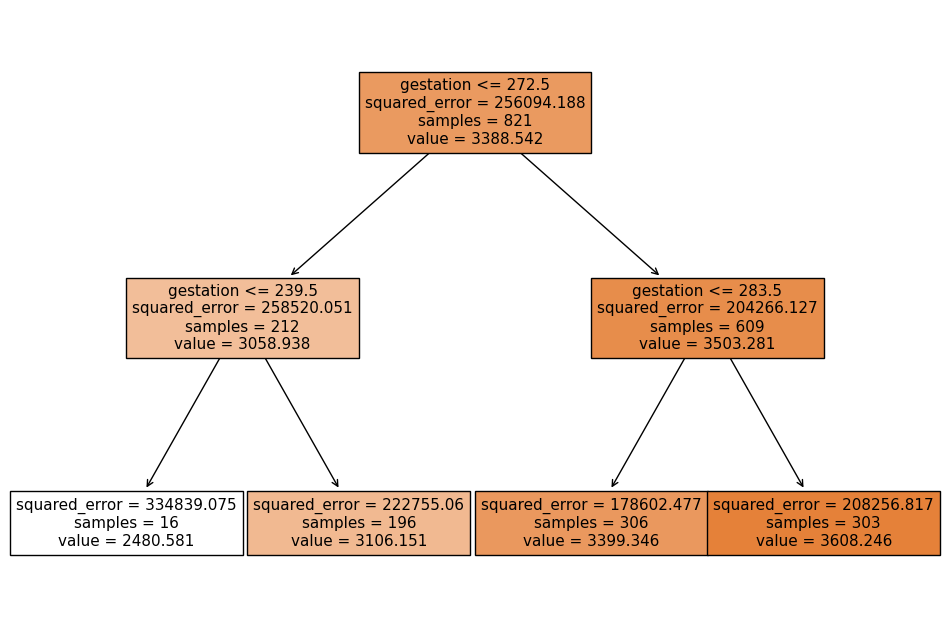

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
dt_feature_names =  list(X_train.columns)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regr_1, filled=True, feature_names=dt_feature_names)
plt.show()

Vous remarquerez dans l'arbre de la figure que vous avez exclusivement des variables quantitative. Si vous souhaitez intégrer des variables binaires, il faudra faire une transformation, ce que nous verrons plus tard.



Nous allons maintenant tester notre modèle sur des données qu'il n'a pas vue. Pour cela, on lui demande de prédire pour le jeu de test le poids en ayant uniquement accès aux autres variables (explicatives), c'est à dire gestation, parity, age, height et smoke. Un premier moyen d'évaluation et d'observer le $R^2$, la mean square error, et la root mean square error. Une seconde évaluation, consiste à observer visuellement les données prédites par rapport aux données réelles.


In [13]:
y_1 = regr_1.predict(X_test)

R-squared: 0.2216432399460484
MSE:  234696.44258601364
RMSE:  484.4547890010105


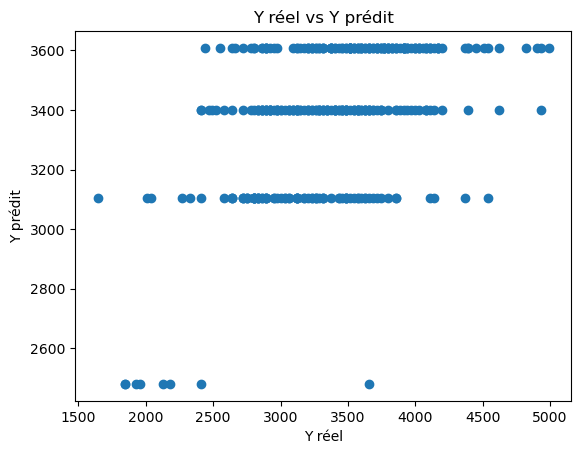

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_1)
score =  r2_score(Y_test, y_1)

print("R-squared:", score)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
plt.scatter(Y_test, y_1, )
plt.title("Y réel vs Y prédit")
plt.xlabel("Y réel")
plt.ylabel("Y prédit")
plt.show()

Commentez l'arbre obtenu (description des groupes). Quelle est/sont les variables de \textit{split} les plus discriminantes ?

Commentez le $R2$ obtenu. Comparez le avec le $R^2$ issue des données d'entraînement. Est-on en underfit ou overfit ?

À partir du graph ci dessus, décrire le comportement du modèle.

Construire un second modèle (regr_2) dont la profondeur max est égale à 3.
Dans une variable y_2, sotocker les prédition issue du jeu de test. Comparer les performances (R2, MSE, RMSE) des deux modèles

Interprétez l'arbre obtenu. Quelle autre variable a fait son apparition ?

Quelles sont les variables qui influencent le poids d'un nourrisson (selon les deux modèles) ?

Quel est le meilleur modèle ?

Nous allons expérimenter avec le paramètre
max\_depth uniquement. Le code suivant vous permet par exemple de comparer $y_1$ et $y_2$ (prédictions issues sous deux paramétrages différents) selon la variable explicative gestation).

In [15]:
X_test_temp = X_test.loc[:, X_test.columns == "gestation"]

In [16]:
# Plot the results
plt.figure()
plt.scatter(X_test_temp, Y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test_temp, y_1,'o', color="cornflowerblue", label="max_depth=2")
plt.plot(X_test_temp, y_2, 'o',color="yellowgreen", label="max_depth=3")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

NameError: name 'y_2' is not defined

Commenter le graph ci-dessus

## 4. Parameter tuning

Pour réduire la variance, nous contraignons le modèle en utilisant certains des paramètres fournis, par exemple :
- Critère (Fonction de coût utilisée pour mesurer la pureté d'un fractionnement)
- Profondeur maximale de l'arbre
- Echantillons minimums pour chaque nœud scindé
- Echantillons minimums pour chaque noeud terminal
- Nombre maximal de nœuds terminaux

Vous pouvez également trouver plus d'informations  [sur ce  blog](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#four) pour un rappel des paramètres de l'arbre de décision.



Si vous deviez ajuster les paramètres manuellement pour obtenir un score plus élevé sur l'ensemble de données de test, nous nous adapterions trop à cet ensemble de données de test spécifique et le modèle ne serait pas bien généralisé à un ensemble de données de test secondaire.  
Pour éviter cela, nous utiliserons la validation k-fold. En plus de la validation k-fold, nous utiliserons GridSearchCV de sklearn, qui nous permet d'utiliser la validation k-fold pour évaluer chaque permutation de valeurs possibles pour les paramètres que nous fournissons.

**Remarque : comme nous entraînons un régresseur une fois pour chaque permutation possible des valeurs des paramètres spécifiés, l'exécution de la cellule suivante prendra un certain temps.  C'est pourquoi vous devez acquérir une intuition sur les valeurs à tester !

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Set parameters to search through - known as parameter grid
parameters = {'max_depth':[8,10,14,20,25],
              'min_impurity_decrease': [.15,.1,.01, 0.0],
              'min_samples_split': [25,10, 50, 2]}
# Initialize model
decision_regressor= DecisionTreeRegressor(random_state=42)

# Initialize GridSearch and then fit
regressor = GridSearchCV(decision_regressor, parameters)
regressor.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [8, 10, 14, 20, 25],
                         'min_impurity_decrease': [0.15, 0.1, 0.01, 0.0],
                         'min_samples_split': [25, 10, 50, 2]})

In [18]:
# Print out what GridSearchCV found to be the best parameters
regressor.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.15,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [19]:
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test,model_parameters, print_oob_score=False):
  # Step 1
  regressor = sklearn_regressor(**model_parameters)
  # Step 2
  regressor.fit(X_train, y_train)
  # Step 3
  training_score = regressor.score(X_train, y_train)
  testing_score = regressor.score(X_test, y_test)
  # Step 4
  print("Train score: ", training_score)
  print(f"Test score: ", testing_score)
  if print_oob_score :
    print("OOB score", regressor.oob_score)
  return regressor

Que fait la fonction train_score_regressor()? Commenteter les 4 steps

In [20]:
# Evaluate the tuned model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train,
                                          y_train=Y_train,
                                          X_test=X_test,
                                          y_test=Y_test,
                                          model_parameters=regressor.best_estimator_.get_params())

Train score:  0.39138680875674525
Test score:  0.17003239562485528


Afficher les meilleurs hyperparamètres et les commenter

Afficher les valeurs prédites et réelles pour le jeu de train et de test

## 5. Feature Importance

Nous pouvons voir quelles variables déterminent les prédictions de notre modèle en examinant l'importance des covariables.

N'oubliez pas que la valeur dans l'arbre associée à la variable n'est pas une indication de l'importance de la variable, seul l'ordre compte !

Par exemple,
- la variable A a une importance de 0,5
- la variable B a une importance de 0,25.

Ce genre d'output veut dire que la variable A explique plus de variance que la variable B, **non** que la variable A explique deux fois plus que la variable B.

In [21]:
# Get the feature importances from our final trained model...
importances = trained_regressor.feature_importances_

# Find the indices of the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting a bar chart of feature importances in descending order
plt.figure(figsize=(12,7))
sns.barplot(y=X_train.columns[indices],x=importances[indices]);

Donner les principales covariables permettant de minimiser la variance dans les feuilles

## Optimisation de l'algorithme avec K-folds



Nous montrons ci-dessous comment le modèle se comporte sur les ensembles de données d'entraînement et de test en faisant varier la profondeur maximale de l'arbre.

In [22]:
# define max depth range
depth_range = np.asarray(range(2,30,2))

# initialize empty arrays to store the results
scores_train = np.zeros(len(depth_range))
scores_test = np.zeros(len(depth_range))

for i in range(len(depth_range)):
    # train DTR with given max depth
    dt_regressor = DecisionTreeRegressor(max_depth=depth_range[i], random_state=42)
    model = dt_regressor.fit(X_train, Y_train)
    # evaluate on both training and test datasets
    scores_train[i] = model.score(X_train, Y_train)
    scores_test[i] = model.score(X_test, Y_test)

# plot the results on the same graph
ax = sns.regplot(x=depth_range, y=scores_train, order=3, ci=None,label='train')
sns.regplot(x=depth_range, y=scores_test,order=3, ci=None, label='test', ax=ax)
ax.legend(loc='best')
ax.set_ylabel('R2 from regression between true and predicted values')
ax.set_xlabel('Max depth of the tree')


Text(0.5, 0, 'Max depth of the tree')

Interpréter ces résultats

#K-folds (validation croisée)
Les K-folds sont une méthode d'évaluation et de mise au point d'un modèle sur un ensemble de données donné, sans overfitting sur l'ensemble de données d'apprentissage ou de l'ensemble de données de test. Elle trouve l'équilibre optimal entre le biais et la variance du modèle.




La validation croisée de K-Folds procède ainsi :
- Elle divise l'ensemble de données en K sous ensembles aléatoires égaux.
- Entraîne les données sur K-1 sous-ensembles
- Évaluer les performances sur le Kème sous-ensemble laissé de côté.
- Stocke la métrique d'évaluation
- répète K fois pour chaque sous-ensemble aléatoire.

Si K = 5, l'algorithme s'entraîne 5 fois. Chaque fois, il retient un cinquième des données, s'entraîne sur les 4/5èmes restants, puis évalue les performances sur le cinquième retenu.

Voici un exemple de la façon dont le score de validation croisée change avec la profondeur maximale de l'arbre.

In [23]:
# initialize empty array to store results
scores_cv = np.empty(len(depth_range))
for i in range(len(depth_range)):
    # initialize model
    dt_regressor = DecisionTreeRegressor(max_depth=depth_range[i], random_state=42)
    # calculate the cross val scores. This returns an array where each element corresponds to the performance on each k-fold.
    cv_scores = cross_val_score(dt_regressor, X_train, Y_train,cv=5, n_jobs=-1)
    # calculate mean cross validation score and save
    scores_cv[i] = np.mean(cv_scores)

In [24]:
# plot results
ax = sns.regplot(x=depth_range, y=scores_cv, ci=None, order=3);
ax.set_xlabel('Max depth of the tree');
ax.set_ylabel('Average cross validated R2');

Interpréter ce résultat

### GridSearchCV (CV = cross validation)
Ci-dessus, nous avons examiné un seul paramètre. Malheureusement la variation de ce paramètre ne permet pas de faire un bon modèle...

GridSearchCV de Sklearn utilise la validation croisée ci-dessus pour évaluer les performances de **chaque permutation possible** des hyper-paramètres que vous spécifiez. Pour cette raison, il faut veiller à choisir la bonne plage de paramètres à rechercher, car l'ajout d'un paramètre supplémentaire peut augmenter le temps de recherche de manière exponentielle.

Elle renvoie ensuite un modèle initialisé avec les paramètres optimaux.

In [25]:
# GridSearchCV?

In [26]:
parameters = {'min_impurity_decrease': [.1, 0.01, 0.],
              'max_depth': [None, 5, 6,7,8,9, 10,11,12,13,14,15,20]}

# initialize model
gridrf = DecisionTreeRegressor()

# set up and fit gridsearchCV
grid_rf = GridSearchCV(gridrf, parameters)
grid_rf.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 20],
                         'min_impurity_decrease': [0.1, 0.01, 0.0]})

In [27]:
# evaluate the tuned model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train,
                                          y_train=Y_train,
                                          X_test=X_test,
                                          y_test=Y_test,
                                          model_parameters=grid_rf.best_estimator_.get_params())

Train score:  0.3792100721859677
Test score:  0.1368141574975028


Nous pouvons vérifier la variation du score moyen de validation croisée pour les différentes permutations de paramètres dans la recherche en grille et voir quels paramètres ont le plus grand impact sur les performances.



In [28]:
# get the cross validation mean score and associated std across the K folds
means = grid_rf.cv_results_['mean_test_score']
stds = grid_rf.cv_results_['std_test_score']
# print the mean, std and parameters for each permutation
for mean, std, params in zip(means, stds, grid_rf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

-0.762 (+/-0.549) for {'max_depth': None, 'min_impurity_decrease': 0.1}
-0.724 (+/-0.590) for {'max_depth': None, 'min_impurity_decrease': 0.01}
-0.688 (+/-0.395) for {'max_depth': None, 'min_impurity_decrease': 0.0}
0.067 (+/-0.141) for {'max_depth': 5, 'min_impurity_decrease': 0.1}
0.068 (+/-0.140) for {'max_depth': 5, 'min_impurity_decrease': 0.01}
0.067 (+/-0.141) for {'max_depth': 5, 'min_impurity_decrease': 0.0}
0.001 (+/-0.237) for {'max_depth': 6, 'min_impurity_decrease': 0.1}
0.014 (+/-0.203) for {'max_depth': 6, 'min_impurity_decrease': 0.01}
0.040 (+/-0.198) for {'max_depth': 6, 'min_impurity_decrease': 0.0}
-0.054 (+/-0.316) for {'max_depth': 7, 'min_impurity_decrease': 0.1}
-0.090 (+/-0.299) for {'max_depth': 7, 'min_impurity_decrease': 0.01}
-0.078 (+/-0.288) for {'max_depth': 7, 'min_impurity_decrease': 0.0}
-0.125 (+/-0.295) for {'max_depth': 8, 'min_impurity_decrease': 0.1}
-0.178 (+/-0.371) for {'max_depth': 8, 'min_impurity_decrease': 0.01}
-0.145 (+/-0.423) for {'ma

Quel sont les deux critères qui ont le plus d'importance

Dans ce cas particulier, le paramètre max_depth et min impurty_decrease a le plus grand impact.

Question à 1000 euros : allez vous implémenter ce modèle et si oui sous quel paramétrage ?

Malgré nos tentatives le modèle reste en overfitting. On devra tester une autre méthode...

# Les arbres de classification

Lorsque les variables explicatives sont de qualitatives, vous utiliserez un arbre de classification. Avec des variables qualitatives, le n\oe{}ud séparera les modalités de cette variables en deux ensembles disjoints. Si nous avons $n$ modalités possible, pour une variable qualitative $X$, il y aura alors $2^{n-1}-1$ conditions de séparations possible sur cette variable. L'algorithme utilisé ici (CART) va tester toutes les possibilités et chercher à maximiser l'inertie intra-classe et minimiser l'inertie interclasse.
Si notre variable cible est-elle aussi qualitative, les classes afficheront probabilité d'avoir une ) ou plusieurs modalités (selon si votre variable à prédire est binaire ou multi-modale).
Comme pour les arbres de régression, l'algorithme sélectionne les variables qui ont le meilleur critère de séparation, et s'arrête lorsque la séparation n'est plus utile.

## Les données du Titanic

Dans cet exemple nous allons observer les passagers du Titanic et identifier les variables qui joué un rôle dans leurs probabilités de survie. Vous pouvez retrouver ces données sur [ce lien](https://vincentarelbundock.github.io/Rdatasets/datasets.html). \\
Nous avons 1316 passagers avec les informations suivantes:


*   X qui est l'ID du passager
*   class : la classe du passager (1ier,2ieme,3ieme)
*   age : deux catégories d'age : adulte ou enfant
*   sex : si le passager est un homme ou une femme
*   survived : si le passager a survécu (yes) ou pas (no)



In [29]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

myData = pd.read_csv('titanic.csv')
print(myData.head())


   id      class     age  sex survived
0   1  1st class  adults  man      yes
1   2  1st class  adults  man      yes
2   3  1st class  adults  man      yes
3   4  1st class  adults  man      yes
4   5  1st class  adults  man      yes


Commentez les données (nombre de modalité, répartition de l'age, taux de survie).  Quelles sont les variables binaires et quelles sont les variables à plus de deux modalités? Utilisez la fonction describe() pour répondre à cette question.

In [80]:
myData.astype('object').describe()

,id,class,age,sex,survived
count,1316,1316,1316,1316,1316
unique,1316,3,2,2,2
top,1,3rd class,adults,man,no
freq,1,706,1207,869,817


In [81]:
myData.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['id', 'class', 'age', 'sex', 'survived'], dtype='object')>

Supprimez la variable $id$ qui n'est pas une donnée exploitable.

In [82]:
myData2=myData.drop(columns='id')

## Transformation des données et création des dataframes

La fonction DecisionTreeClassifier de sklearn ne permet pas de traiter les données catégorielles en tant qu'objet. Vous devez transformer ces variables en variables binaires (ne donc que des 0 et des 1). Par exemple une transformation de la variable sex aboutira à deux colonnes  sex\_man et sex\_women. Si une personne est de sexe féminin, elle aura 1 à la variable sex\_women et 0 pour  sex\_man  (le même principe est appliqué pour les variables catégorielles multi-modale).
Pour effectuez cette transformation, appliquez le code suivant


In [89]:
myData

,id,class,age,sex,survived
0,1,1st class,adults,man,yes
1,2,1st class,adults,man,yes
2,3,1st class,adults,man,yes
3,4,1st class,adults,man,yes
4,5,1st class,adults,man,yes
...,...,...,...,...,...
1311,1312,3rd class,child,women,no
1312,1313,3rd class,child,women,no
1313,1314,3rd class,child,women,no
1314,1315,3rd class,child,women,no


In [83]:
myData_bin = pd.get_dummies(myData2, columns=['class','age','sex'])

X, y = myData_bin.loc[:, myData_bin.columns != 'survived'] , myData_bin['survived']
print(X.head())

   class_1st class  class_2nd class  class_3rd class  age_adults  age_child  \
0                1                0                0           1          0   
1                1                0                0           1          0   
2                1                0                0           1          0   
3                1                0                0           1          0   
4                1                0                0           1          0   

   sex_man  sex_women  
0        1          0  
1        1          0  
2        1          0  
3        1          0  
4        1          0  


Une fois ces données transformées, nous allons séparer les données en deux dataframe respectivement pour les covariables et la variable à prédire et définir nos dataframes de train/test.

Créer un set de test et de train sur un ration 30/70 et un random_state à 0

In [84]:
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [85]:
list(X_train.columns)

['class_1st class',
 'class_2nd class',
 'class_3rd class',
 'age_adults',
 'age_child',
 'sex_man',
 'sex_women']

## Création de l'arbre

Des arbres de classification et de régression peuvent être générés à travers le package \textit{skitlearn}. La fonction \texttt{DecisionTreeClassifier} utilise un critère choisi en paramètre (Entropie ou de indece de Gini par exemple) pour choisir la meilleur séparation de ces noeud.
L'entropie de Shannon, due à Claude Shannon, est une fonction mathématique qui, intuitivement, correspond à la quantité d'une variable d'intérêt contenue dans un ensemble présentant d'autres d'informations.

Le coefficient de Gini due à Corrado Gini, est équivalent à l'écart moyen relatif (l'écart moyen divisé par la moyenne pour le mettre à l'échelle) : il s'agit donc bien d'une mesure de dispersion de valeurs numériques\footnote{0 signifie l'égalité parfaite et 1 signifie une inégalité parfaite}.

L'entropie mesure  de "l'incertitude" contenue dans un jeu de données.

Soit un problème de classification avec $K$ classes possibles avec des proportions $p_i$ pour $i=1$ à $K$. On définit l'entropie (dans le cas de deux classes possiblez), telle qu'une entropie égale à 0 indique une concentration unique d'une seule classe. A contrario, une entropie de 1 indique une répartition équilibrée. Dans le cadre de la construction de l'arbre, la variable de split est celle qui minimise l'entropie deux feuilles obtenues (pour plus d'informations, consultez le poly).
Le code pour obtenir un arbre basé sur l'entropie est le suivant


Passons maintenant à la création du modèle ! Nous allons cette fois utiliser graphviz qui offre des arbres plus lisibles

In [86]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Extracting feature names
dt_feature_names = list(X_train.columns)


# Export the tree to DOT format
dot_data = export_graphviz(clf, out_file=None, feature_names=dt_feature_names,
                           class_names=['no', 'yes'], filled=True, rounded=True, special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Render the graph to a file (e.g., PDF or PNG) or display it directly
graph.render("decision_tree")

# If you want to display it directly in a Jupyter notebook
graph


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

Pour quelle raison certain noeuds terminaux peuvent avoir une entropie nulle ?

Quel noeud terminal a le plus grand échantillon ? Quelle est la prédiction associée ?  

 Quelle sera la prédiction (classe et probabilité) pour un petit garçon de seconde classe ?

La  2ème classe a-t-elle privilégié les femmes et les enfants d'abord ? La 1ère ? La 3ème ?

 Donnez la formule mathématique de calcule de l'entropie de Shannon.

## Le coefficient de Gini

Pour conserver la distribution des classes, on utilise l'indice de Gini. Plus les classes sont uniformément distribuées dans un noeud, plus l'indice de Gini est élevé; plus un noeud est pur, plus son indice de Gini est bas. Dans le cas de deux classes, l'indice de Gini va de 0 (noeud pur) à 0,5 (mélange maximal). Intuitivement, l'indice de Gini mesure la probabilité que deux individus choisis aléatoirement (avec remise) dans un noeud, appartiennent à deux classes différentes. \\
À chaque séparation, l'arbre va se construire en cherchant à donner la plus grande pureté à ses noeuds fils, et donc baisser l'indice de Gini.

Construisez un arbre basé sur l'indice de Gini et comparez votre modèle au précédent, en regardant notamment les quatre question précédentes.

Quels sont les autres paramètres possibles de la fonction \texttt{DecisionTreeClassifier} ?

Donnez la formule mathématique de calcule du coefficient de Gini

Que reste-il à faire pour évaluer la qualité de notre modèle ?

In [ ]:
?DecisionTreeClassifier

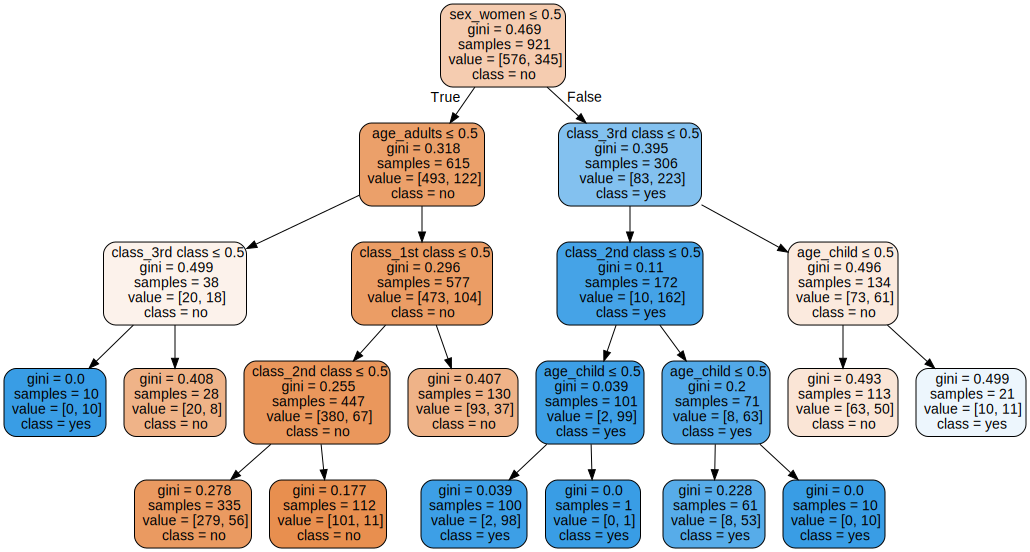

In [ ]:
from sklearn import tree

clf2 = tree.DecisionTreeClassifier(criterion='gini')
clf2.fit(X_train, y_train)
cn=[ 'no','yes']
dt_feature_names =  list(X.columns)

# Export the tree to DOT format
dot_data = export_graphviz(clf2, out_file=None, feature_names=dt_feature_names,
                           class_names=['no', 'yes'], filled=True, rounded=True, special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Render the graph to a file (e.g., PDF or PNG) or display it directly
graph.render("decision_tree")

# If you want to display it directly in a Jupyter notebook
graph

## Évaluation du modèle

Nous allons regarder différentes métriques de qualité pour notre modèle. Vous connaissez déjà la Hinge Loss et Log loss.  Vous pouvez également utilisez une matrice de confusion. Cette matrice mesure la qualité d'un système de classification : chaque ligne correspond à une classe réelle, chaque colonne correspond à une classe estimée. On peut ainsi voir la correspondance entre le nombre d'éléments de la classe réelle qui ont été bien/mal classé. Un des intérêts de la matrice de confusion est qu'elle montre rapidement si un système de classification parvient à classifier correctement.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[227  14]
 [ 73  81]]


Essayons de rendre cela plus jolie

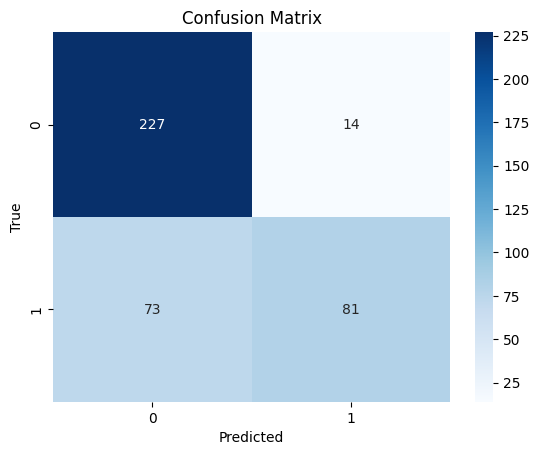

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Quel est le taux de bonne classification ?  Afficher la précision du modèle avec la fonction accuracy

Combien de 'survivants' ont été classé comme 'morts' ?

Quelle erreur commet majoritairement le modèle ?

Survivants qui sont prédit comme mort

Donnez la formule mathématique de la Hinge Loss et la Log Loss.

À l'aide de la librairie sklearn.metrics, calulez la Hinge Loss et la Log Loss des deux modèles (Entropie et Gini).

Comparez la matrice de confusion des deux modèles.

Faire varier  max_depth de 1 à 10 et regarder l'évolution de l'accuracy en train et en test pour un modèle basé sur le coef de Gini

Proposer une valeur pour max_dept

Observer l'évolution de l'accuaracy sur le paramétrage max_dept à l'aide de la k-fold.

Trouver la paramétrage optimal selon la méthode de GridSearch

Comparer le paramétrage recommander selon la méthode GridSearch et K-fold (Cross val)

Entrainer un arbre selon les paramètres proposés par GridSearch et regarder l'importance de chaque covariable.
Conclure sur les deux critères contribuants le plus à l'arbre de décision

Question à 1000 euros : implémentez vous ce modèle et si oui sous quel paramétrage ?